<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменениие-типов-данных" data-toc-modified-id="Изменениие-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменениие типов данных</a></span></li><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка аномалий</a></span></li></ul></li><li><span><a href="#Подсчет-и-добавление-новых-столбцов" data-toc-modified-id="Подсчет-и-добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подсчет и добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-отдельных-параметров-объявлений" data-toc-modified-id="Исследование-отдельных-параметров-объявлений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование отдельных параметров объявлений</a></span></li><li><span><a href="#Сроки-продажи-квартир" data-toc-modified-id="Сроки-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сроки продажи квартир</a></span></li><li><span><a href="#Зависимость-цены-от-других-параметров" data-toc-modified-id="Зависимость-цены-от-других-параметров-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Зависимость цены от других параметров</a></span></li><li><span><a href="#Средняя-цена-одного-квадратного-метра" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра</a></span></li><li><span><a href="#Зависимость-стоимости-от-расстояния-до-центра-города" data-toc-modified-id="Зависимость-стоимости-от-расстояния-до-центра-города-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Зависимость стоимости от расстояния до центра города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Цель исследования

Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

# Описание данных
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

# Этапы исследования 
1. Обзор данных.
2. Предобработка данных.
3. Подсчет и добавление новых столбцов.
4. Исследовательский анализ данных.

## Обзор данных

In [1]:
# импортируем нужные библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# сохраним файл с данными в переменную data
# разделитель указываем '\t', т.к. данные в таблице разделены им

data = pd.read_csv('***', sep='\t')

In [3]:
# выведем на экран первые 20 строк таблицы

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# посмотрим общую информацию о таблице

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что в таблице 23699 строк и 22 столбца. 14 столбцов типа `float`, `int` и `object` - по 3, `bool` - 2 столбца.
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Странно то, что колонка `is_apartment` имеет тип `object`, хотя в описании данных заявленный тип - `bool`. Судя по всему, повлияли пропуски.

In [5]:
# посчитаем колиество пропущенных значений в столбцах

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Колонок с пропущенными значениями, да и самих пропущенных значений достаточно много. Для простоты восприятия визуализируем количество пропусков, а также отдельно переведем количество пропусков в проценты и отсортируем по убыванию.

<AxesSubplot:>

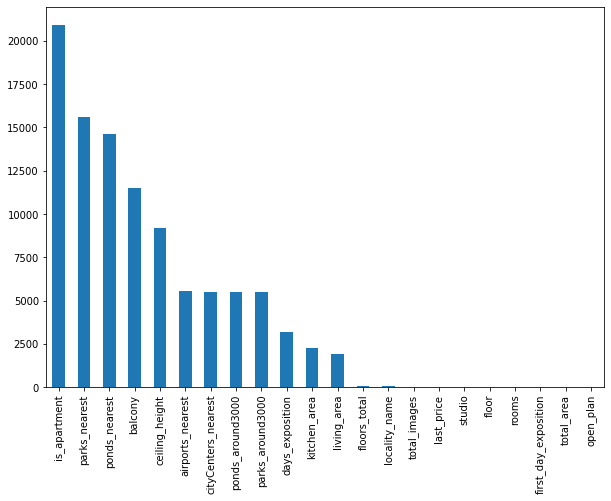

In [6]:
# построим столбчатую диаграмму количества пропусков

data.isna().sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 7))

In [7]:
# посмотрим на доли пропущенных значений 

((data.isna().sum()/len(data))*100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

В колонке `is_apartment` пропущено почти 90% значений. Еще много пропусков в колонках, которые заполняются автоматически на основе картографических данных: `parks_nearest`, `ponds_nearest`, `airports_nearest`, `city_centers_nearest` и т.д. Возьмем этот факт на заметку. 
Значительные доли пропусков в `balcony` и `ceiling_height`. По некоторым объявлениям не указано количество дней их размещения. Чуть меньше пропусков в стобцах с площадью кухни и жилой зоны. Меньше 1% пропусков в количестве этажей и названии населенного пункта.

In [8]:
# посмотим на статистические показатели

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


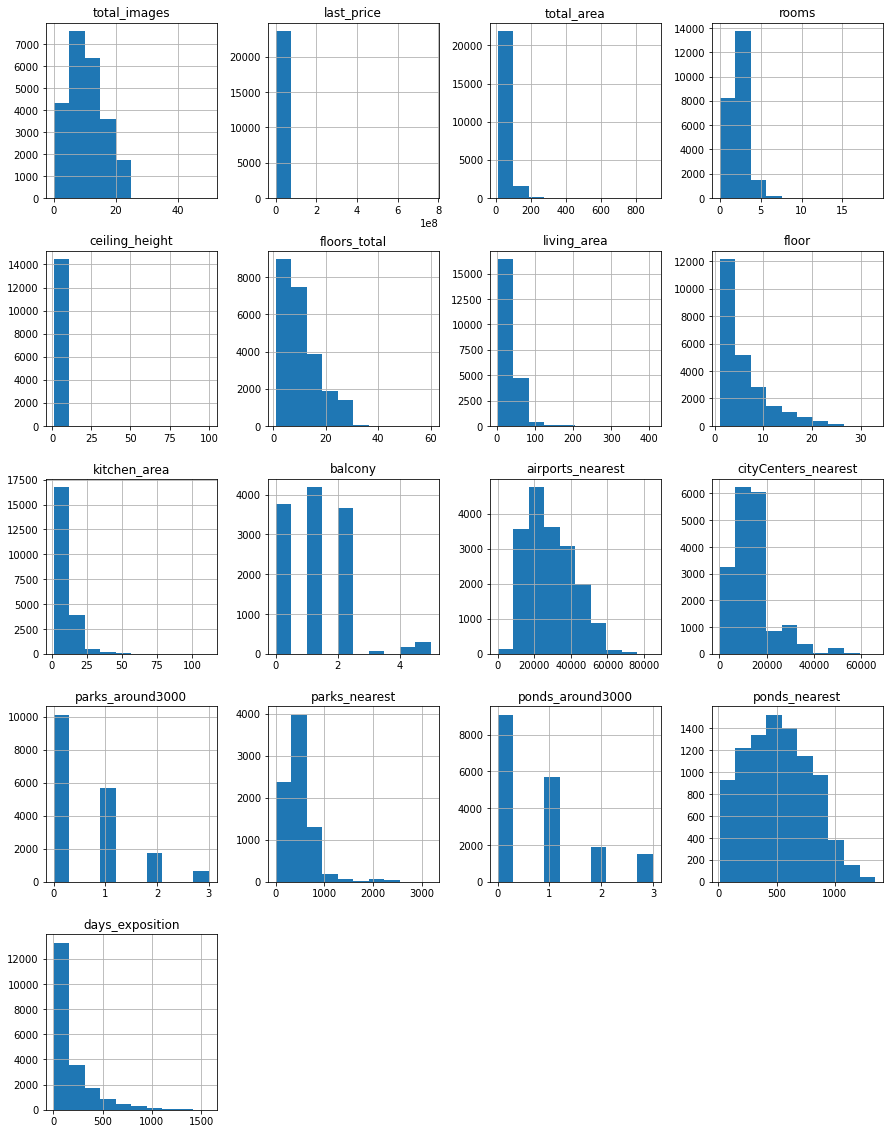

In [9]:
# построим гистограммы по числовым данным

data.hist(figsize=(15, 20));

Бросаются в глаза некоторые странные значения:
* Минимальное количество команат 0, может быть речь идет о студиях.
* Максимальное число комнат - 19. Похоже на выброс, учитывая, что на 3-м квартиле значение 3.
* Минимальная высота потолка 1 м, а максимальная 100 м. Не очень правдоподобно. Похоже на ошибки.
* Максимальная общая площадь - 900 м², максимальная жилая площадь - 409 м², максимальная площадь кухни - 112 м². (Выбросы?)
* Самый высокий дом 60 этажей, а самая высоко расположенная квартира на 33 этаже.
* Максимальная срок размещения объявления 1580 дней (4,3 года). 

**Выводы**

В исходных данных много пропусков. Это может искажать общее представление. Много пропущенных картографических значений, которые заполняются автоматически. Есть неправдоподобные данные, например, о высоте потолков некоторых квартир (1 м и 100 м). Судя по всему, есть выбросы (где-то 19 комнат, где-то общая площадь 900 м²). Для дальнейшего исследования нужно разобраться с пропусками.

## Предобработка данных

In [10]:
# на этапе обзора данных можно было кое-что заметить...
# для этого посмотрим отдельно на названия колонок

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Особо придраться не к чему. Единственное, для названия столбца `cityCenters_nearest` частично используется стиль CamelCase. Не критично, но исправим это.

In [11]:
# приведем название столбца 'cityCenters_nearest' в соответствие со «змеиным_регистром»

data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [12]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропусков

Вернемся к пропускам, а точнее к долям пропусков.

In [13]:
((data.isna().sum()/len(data))*100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Начнем с первого по количеству пропусков столбца - `is_apartment`. Попробуем найти какие-либо закономерности и понять природу этих пропусков.

In [14]:
# посчитаем частоту уникальных значений 

data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Сразу видно, что даже среди немногочисленных имеющихся значений есть перекос в сторону жилой недвижимости. Возможно, в Санкт-Петербурге и соседних населённых пунктах в принципе преобладает жилая недвижимость, и пропущенные значения можно заменить на `False`. Хорошо бы понимать, какую реальную долю рынка недвижимости составляют апартаменты.

По данным сайта https://spb.cian.ru/ доля аппартаментов в Санкт-Петербурге для продажи составляет примерно 4%. Думаю, ориентируясь на эту цифру, можно спокойно заменить пропуски на жилую недвижимость. Скорее всего сами пропуски и связаны с тем, что в Питере преобладает жилая недвижимость, поэтому продавцы часто не указывают этот параметр.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [16]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Смущает большое количество пропусков в столбцах, которые заполняются автоматически на основе картографических данных. Возможно, картографические данные подтягиваются, если пользователи помечают свой объект отметкой на карте. Однако тогда странно, что количество пропущенных значений в разных картографических столбцах разнится. Но только не в `parks_around3000`, `ponds_around3000`: в них по 5518 пропусков. Вернемся к  картографическим колонкам позже.

А пока изучим пропущенные значения в столбце, отображающем число **балконов**. Для начала посмотрим на частоту уникальных значений. 

In [17]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [18]:
# посмотрим как коррелирует число балконов с другими показателями

data.corr()['balcony'].sort_values()

parks_around3000       -0.082850
days_exposition        -0.032909
ponds_around3000       -0.032709
ponds_nearest           0.010847
rooms                   0.017991
living_area             0.018849
open_plan               0.019491
last_price              0.029646
studio                  0.031455
ceiling_height          0.040523
is_apartment            0.043119
total_area              0.047937
city_centers_nearest    0.051051
parks_nearest           0.052328
airports_nearest        0.066834
kitchen_area            0.098634
total_images            0.121693
floor                   0.168773
floors_total            0.194065
balcony                 1.000000
Name: balcony, dtype: float64

Наибольшая корреляция (0,19) числа балконов с числом этажей в доме. Но трудно сказать, что она существенная.

<AxesSubplot:xlabel='balcony', ylabel='floors_total'>

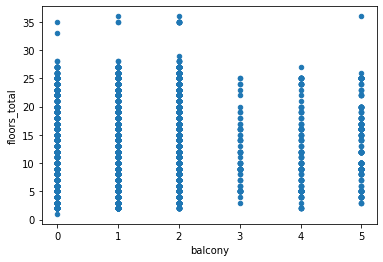

In [19]:
# построим диграмму рассеяния числа балконов и этажей в доме

data.plot(x='balcony', y='floors_total', kind='scatter')

Не видно особой зависимости. Скорее всего, как и в случае с апартаментами, пропуски стоят там, где этих балконов попросту нет. Заполним эти пропуски нулями.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

In [21]:
data['balcony'].isna().sum()

0

Теперь перейдем к **высоте потолков**. Здесь почти 40% пропусков. Сразу посмотрим на корреляцию.

In [22]:
data.corr()['ceiling_height'].sort_values()

city_centers_nearest   -0.091689
ponds_nearest          -0.059090
floors_total           -0.028732
airports_nearest       -0.023947
parks_nearest          -0.019167
floor                  -0.011798
total_images           -0.001987
studio                  0.001674
days_exposition         0.019091
balcony                 0.031216
open_plan               0.042777
rooms                   0.054457
parks_around3000        0.065915
ponds_around3000        0.078209
last_price              0.085430
kitchen_area            0.087641
living_area             0.090650
total_area              0.095490
is_apartment            0.154959
ceiling_height          1.000000
Name: ceiling_height, dtype: float64

In [23]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Как видно, высота потолков больше всего связана с тем, является ли помещение апартаментами или нет (корреляция 0,15). Это логично. Но опять же, это не особо значительная корреляция. Обычно в таких случаях логичнее всего заполнить пропуски медианными значениями. Посмотрим отдельно на медианные значения высоты потолков у апартаментов и жилых помещений.

In [24]:
data.query('is_apartment == True')['ceiling_height'].median()

3.0

In [25]:
data.query('is_apartment == False')['ceiling_height'].median()

2.65

В апартаментах медиана повыше. Посмотрим, есть ли пропуски среди апартаментов.

In [26]:
data.query('is_apartment == True')['ceiling_height'].isna().sum()

6

Пропуски есть и у апартаментов. Причину пропусков точно сложно определить, но, вероятнее всего, просто человеческий фактор. В таком случае, заполним пропуски соответствующими медианными значениями.

In [27]:
for status in data['is_apartment'].unique(): 
    data.loc[(data['is_apartment'] == status) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['is_apartment'] == status), 'ceiling_height'].median()

In [28]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724447
std          0.988307
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [29]:
data['ceiling_height'].isna().sum()

0

Изучим **длительность размещения объявлений**. Снова начнем с корреляции.

In [30]:
data.corr()['days_exposition'].sort_values()

ponds_nearest          -0.077879
city_centers_nearest   -0.060714
floors_total           -0.052234
floor                  -0.039463
balcony                -0.027834
total_images           -0.026657
open_plan              -0.024112
studio                 -0.022476
airports_nearest       -0.018271
is_apartment            0.015262
ceiling_height          0.018288
parks_nearest           0.023254
parks_around3000        0.060491
ponds_around3000        0.073162
last_price              0.081146
kitchen_area            0.100586
rooms                   0.126961
living_area             0.142454
total_area              0.149675
days_exposition         1.000000
Name: days_exposition, dtype: float64

Незначительная связь с ценой (важным для нас параметром). Оставим пропуски, как есть. Кстати, скорее всего, значения пропущены потому, что на момент выгрузки данных, эти объявления еще не сняты с публикации.

Теперь **площадь кухни и жилая площадь**. Обе колонки заполняются пользователями. Есть гипотеза, что значения могут быть пропущены там, где эти значения сложно определить, а именно в студиях. Сначала вспомним, сколько всего пропусков в столбцах `kitchen_area` и `living_area`. Сделаем срез по студиям и посмотрим на значения площадей.

In [31]:
data['kitchen_area'].isna().sum()

2278

In [32]:
# узнаем, сколько всего студий

len(data.query('studio == True'))

149

In [33]:
# сколько пропусков площади кухни у студий

len(data.query('studio == True and kitchen_area.isna()'))

149

Действительно, во всех студиях пропущены значения площади кухни. Думаю, причина этих пропусков очевидна: в студиях жилая площадь и кухня разделены лишь условно, поэтому эти данные не указаны. Логично, что по студиям эти пропуски можно оставить, как есть. Но большая часть пропусков все-таки не в студиях.
Теперь посмотрим на данные по жилой пощади.

In [34]:
data['living_area'].isna().sum()

1903

In [35]:
len(data.query('studio == True and living_area.isna()'))

10

Из 1903 пропусков только 10 у студий. Узнаем медианное значение доли жилой площади от общей у студий.

In [36]:
data.query('studio == True').corr()['living_area'].sort_values()

city_centers_nearest   -0.377033
floors_total           -0.277133
parks_nearest          -0.214927
floor                  -0.203805
balcony                -0.129023
ponds_nearest          -0.073042
rooms                   0.004627
airports_nearest        0.021876
days_exposition         0.022080
total_images            0.070405
parks_around3000        0.083973
ponds_around3000        0.200192
ceiling_height          0.597564
last_price              0.741941
total_area              0.889014
living_area             1.000000
is_apartment                 NaN
studio                       NaN
open_plan                    NaN
kitchen_area                 NaN
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area', ylabel='total_area'>

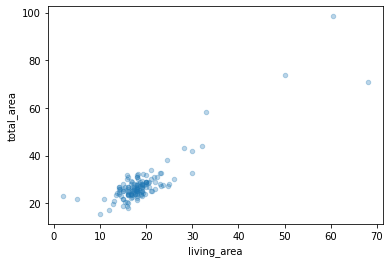

In [37]:
data.query('studio == True').plot(x='living_area', y='total_area', kind='scatter', alpha=0.3)

In [38]:
(data.query('studio == True')['living_area']\
/data.query('studio == True')['total_area']).median()

0.6894049346879536

In [39]:
# запомним медиану в отдельной переменной

med_stud_liv_area_share = 0.6894049346879536

In [40]:
# заполним пропуски в столбце жилой площади у студий 
# с учетом медианной доли от общей площади

for row in data: 
    data.loc[(data['studio'] == True) & (data['living_area'].isna()), 'living_area'] = \
    data['total_area']*med_stud_liv_area_share

С пропусками в `kitchen_area` и `living_area` у студий разобрались. Теперь вернемся к остальным помещениям.

Посмотрим, от чего больше всего зависит жилая площадь

In [41]:
data.query('studio == False').corr()['living_area'].sort_values()

city_centers_nearest   -0.231934
floors_total           -0.165881
floor                  -0.095215
ponds_nearest          -0.081555
airports_nearest       -0.059178
parks_nearest          -0.049696
open_plan              -0.034018
balcony                -0.012756
is_apartment            0.026824
ceiling_height          0.078503
total_images            0.103400
days_exposition         0.141753
ponds_around3000        0.148974
parks_around3000        0.183427
kitchen_area            0.428674
last_price              0.566164
rooms                   0.848780
total_area              0.939478
living_area             1.000000
studio                       NaN
Name: living_area, dtype: float64

Наибольшая связь с общей площадью и числом комнат. Построим соответсвующие диграммы рассеяния.

<AxesSubplot:xlabel='living_area', ylabel='total_area'>

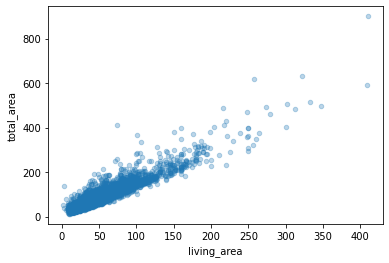

In [42]:
data.query('studio == False').plot(x='living_area', y='total_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='rooms', ylabel='living_area'>

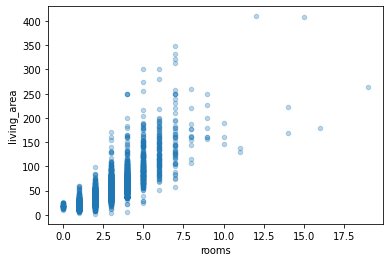

In [43]:
data.query('studio == False').plot(x='rooms', y='living_area', kind='scatter', alpha=0.3)

Связь с общей площадью и числом комнат достаточно очевидна и наглядна. Посчитаем медианные доли жилой площади от общей с учетом числа комнат.

In [44]:
data_liv_area_share = data.query('studio == False and rooms != 0')[['rooms', 'living_area', 'total_area']]

In [45]:
data_liv_area_share['liv_share'] = data_liv_area_share['living_area']/data_liv_area_share['total_area']

In [46]:
data_rooms_liv_area_stat = data_liv_area_share.pivot_table(index='rooms', values='liv_share', aggfunc='median')

In [47]:
data_rooms_liv_area_stat.columns = ['median_liv_share']

In [48]:
data_rooms_liv_area_stat

,median_liv_share
rooms,
1,0.482353
2,0.585009
3,0.631667
4,0.659740
5,0.651842
6,0.679412
7,0.681670
8,0.688475
9,0.628251


In [49]:
data = data.merge(data_rooms_liv_area_stat, on='rooms', how='left')

Перед заполнением пропусков в жилой площади проверим площадь кухни по тому же принципу.

In [50]:
data.query('studio == False').corr()['kitchen_area'].sort_values()

city_centers_nearest   -0.190049
ponds_nearest          -0.105223
airports_nearest        0.008200
parks_nearest           0.029641
balcony                 0.045271
is_apartment            0.049034
ceiling_height          0.071633
parks_around3000        0.087503
days_exposition         0.100586
total_images            0.104756
floor                   0.135531
ponds_around3000        0.150148
floors_total            0.163944
median_liv_share        0.184464
rooms                   0.269945
living_area             0.428674
last_price              0.519869
total_area              0.609121
kitchen_area            1.000000
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>

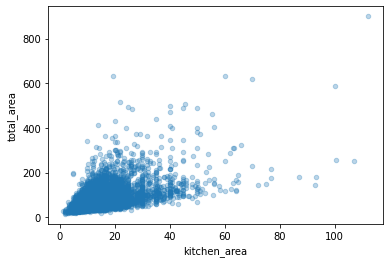

In [51]:
data.query('studio == False').plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.3)

С площадью кухни посложнее. Да, корреляция с общей площадью заметная: 0.61. Но пока не ясно, что делать. Оставим пропуски площади кухни как есть. Кроме того, видно, что жилая площадь больше коррелирует с ценой закрытия объявления, чем площадь кухни. Не хочется исказить данные, случайно заполнив пропуски площади кухни и получить сумму кухни и жилой площади больше, чем общая площадь.

Проверим наличие аномалий в данных, где нарушена логика суммы жилой площади и кухни. Помимо жилой площади и кухни в квартирах
бывают прихожие, корридоры, туалеты и т.д., поэтому сравним сумму жилой площади и кухни с общей площадью, например, с 90% общей площади и всеми 100%. Посмотрим, сколько наблюдений для каждого условия есть в данных.

In [52]:
data[data['total_area']*0.9 <= (data['living_area']+data['kitchen_area'])]\
[['total_area', 'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [53]:
data[data['total_area'] < (data['living_area']+data['kitchen_area'])]\
[['rooms','studio','total_area', 'living_area','kitchen_area']]

,rooms,studio,total_area,living_area,kitchen_area
184,1,False,30.20,26.10,6.20
545,1,False,23.80,20.00,5.00
551,1,False,31.59,30.55,9.28
601,2,False,53.70,48.30,7.00
696,1,False,34.69,23.43,23.43
...,...,...,...,...,...
21824,2,False,44.00,38.00,8.60
21868,1,False,34.30,30.60,8.00
21915,2,False,91.40,62.00,32.40
21956,2,False,46.00,44.00,8.00


Видим аномалии есть. Есть суммы даже больше всей общей площади. Попробуем все-таки заполнить пропуски жилой площади с учетом числа комнат и медианных долей от общей площади.

In [54]:
for row in data: 
    data.loc[(data['studio'] == False) & (data['living_area'].isna()), 'living_area'] = \
    data['total_area']*data['median_liv_share']

In [55]:
data['living_area'].isna().sum()

4

Снова проверим аномалии

In [56]:
data[data['total_area']*0.9 <= (data['living_area']+data['kitchen_area'])]\
[['total_area', 'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [57]:
data[data['total_area'] < (data['living_area']+data['kitchen_area'])]\
[['rooms','studio','total_area', 'living_area','kitchen_area']]

,rooms,studio,total_area,living_area,kitchen_area
184,1,False,30.20,26.10,6.20
545,1,False,23.80,20.00,5.00
551,1,False,31.59,30.55,9.28
601,2,False,53.70,48.30,7.00
696,1,False,34.69,23.43,23.43
...,...,...,...,...,...
21824,2,False,44.00,38.00,8.60
21868,1,False,34.30,30.60,8.00
21915,2,False,91.40,62.00,32.40
21956,2,False,46.00,44.00,8.00


Далее: **количество этажей в доме**. Скорее всего будет наибольшая связь с этажем расположения квартиры.

In [58]:
data.corr()['floors_total'].sort_values()

parks_around3000       -0.252833
median_liv_share       -0.230926
rooms                  -0.228215
living_area            -0.158933
ponds_around3000       -0.122735
total_area             -0.075774
days_exposition        -0.052234
ceiling_height         -0.026889
is_apartment           -0.026351
last_price             -0.006984
total_images            0.010427
city_centers_nearest    0.019774
ponds_nearest           0.038864
open_plan               0.050791
studio                  0.070151
parks_nearest           0.097527
airports_nearest        0.108288
kitchen_area            0.163944
balcony                 0.172812
floor                   0.678059
floors_total            1.000000
Name: floors_total, dtype: float64

Предсказуемо. Число этажей в доме, как минимум, равно тому, чему равен этаж расположения квартиры. И более... Но мы видим, что связь цены и этажности дома самая маленькая из всех. Поэтому эти пропуски удалим. А причина пропусков опять же, вероятнее всего, человеческий фактор.

In [59]:
data = data.dropna(subset=['floors_total'])

Пропуски в **названии населенного пункта**. Их меньше всего. Скорее всего, это картографическая переменная, которая должна была заполняться автоматически. Но что-то пошло не так. Посмотрим корреляцию цены квартир без точной локации с остальными признаками.

In [60]:
data.query('locality_name.isna()').corr()['last_price'].sort_values()

parks_nearest          -0.310729
floors_total           -0.251382
city_centers_nearest   -0.197856
floor                  -0.152421
ponds_around3000        0.035414
total_images            0.074705
balcony                 0.082778
airports_nearest        0.139804
ceiling_height          0.233225
days_exposition         0.320663
median_liv_share        0.341713
ponds_nearest           0.368740
rooms                   0.390581
parks_around3000        0.412229
kitchen_area            0.482806
living_area             0.753816
total_area              0.815721
last_price              1.000000
is_apartment                 NaN
studio                       NaN
open_plan                    NaN
Name: last_price, dtype: float64

Больше всего цена квартир (без локации) зависит от общей площади.

In [61]:
data.corr()['last_price'].sort_values()

city_centers_nearest   -0.206213
ponds_nearest          -0.085450
airports_nearest       -0.026098
studio                 -0.025083
parks_nearest          -0.016633
open_plan              -0.008801
floors_total           -0.006984
balcony                 0.008598
floor                   0.026644
is_apartment            0.026974
ceiling_height          0.064610
days_exposition         0.081063
total_images            0.104940
parks_around3000        0.151657
ponds_around3000        0.160479
median_liv_share        0.251854
rooms                   0.363124
kitchen_area            0.520018
living_area             0.585258
total_area              0.653581
last_price              1.000000
Name: last_price, dtype: float64

Такая же тенденция и в полных данных. Тогда удалим пропуски. Их в принципе сложно заполнить точно.

In [62]:
data = data.dropna(subset=['locality_name'])

Пропуски в остальных колонках с **картографическими данными**: `parks_nearest`, `ponds_nearest`, `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000` логично заполнить медианными значениями с учетом населенного пункта. Для этого нужно привести в порядок названия локаций.

Взглянем на уникальные значения названий населенных пунктов.

In [63]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Чтобы избавиться от дубликатов, заменим буквы 'ё' на 'е' и удалим все слова перед основными названиями.

In [64]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [65]:
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')

In [66]:
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')

In [67]:
data['locality_name'] = data['locality_name'].str.replace('городской ', '')

In [68]:
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')

In [69]:
data['locality_name'] = data['locality_name'].str.replace('село ', '')

In [70]:
data['locality_name'] = data['locality_name'].str.replace('станции ', '')

In [71]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')

In [72]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')

In [73]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')

In [74]:
data['locality_name'] = data['locality_name'].str.replace('имени ', '')

In [75]:
# число уникальных населенных пунктов

data['locality_name'].nunique()

307

In [76]:
# пропущенные значения в колоках
# parks_nearest, ponds_nearest, airports_nearest, city_centers_nearest
# parks_around3000, ponds_around3000
# заполняем медианными значениями с учетом населенного пункта
for l in data['locality_name'].unique(): 
    data.loc[(data['locality_name'] == l) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
        data.loc[(data['locality_name'] == l), 'parks_nearest'].median()
    data.loc[(data['locality_name'] == l) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
        data.loc[(data['locality_name'] == l), 'ponds_nearest'].median()
    data.loc[(data['locality_name'] == l) & (data['airports_nearest'].isna()), 'airports_nearest'] =\
        data.loc[(data['locality_name'] == l), 'airports_nearest'].median()
    data.loc[(data['locality_name'] == l) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] =\
        data.loc[(data['locality_name'] == l), 'city_centers_nearest'].median()
    data.loc[(data['locality_name'] == l) & (data['parks_around3000'].isna()), 'parks_around3000'] =\
        data.loc[(data['locality_name'] == l), 'parks_around3000'].median()
    data.loc[(data['locality_name'] == l) & (data['ponds_around3000'].isna()), 'ponds_around3000'] =\
        data.loc[(data['locality_name'] == l), 'ponds_around3000'].median()

In [77]:
# посмотим, сколько осталось пропусков в интересующих колонках

((data.isna().sum()/len(data))*100).sort_values(ascending=False)

parks_nearest           25.402079
ponds_nearest           23.411840
ponds_around3000        23.051135
parks_around3000        23.051135
city_centers_nearest    23.051135
airports_nearest        23.051135
days_exposition         13.456397
kitchen_area             9.429238
median_liv_share         0.823255
living_area              0.016974
locality_name            0.000000
balcony                  0.000000
total_images             0.000000
last_price               0.000000
studio                   0.000000
is_apartment             0.000000
floor                    0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Еще много. Совпадают доли пропусков в `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`. Посмотрим срез с пропусками в `ponds_around3000`.

In [78]:
data.query('ponds_around3000.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_liv_share
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.482353
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,False,...,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.482353
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000000,5,False,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.585009
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.585009
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,15.821176,2,False,...,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0.482353


Проверим населенный пункт Янино-1.

In [79]:
len(data.query('locality_name == "Янино-1"'))

68

In [80]:
len(data.query('locality_name == "Янино-1" and ponds_around3000.isna()'))

68

In [81]:
# проверим еще один населенный пункт

len(data.query('locality_name == "Сертолово"'))

142

In [82]:
len(data.query('locality_name == "Сертолово" and ponds_around3000.isna()'))

142

In [83]:
data.query('ponds_around3000.isna() ')['locality_name'].nunique()

282

In [84]:
# доля населенных пунктов с пропущенными картографическими данными

(282/307)*100

91.85667752442997

Похоже все ясно: видимо есть целые населенные пункты в наших данных, у которых картографические данные полностью пропущены. По ним, видимо, произошел сбой или вообще не было возможности собрать эти данные. Всего таких 282 пункта (почти 92%). Пока не будем удалять эти пропуски: их достаточно много.

**Выводы**

Пропуски в колонках:
- `is_apartment` (почти 90%), заполнили `False`, т.к по данным https://spb.cian.ru/ доля аппартаментов в Питере для продажи примерно 4%.
- с картографическими данными (23-65%), т.к по 92% населенных пунктов этих данных нет. Заполнили медианами по локациям.
- число балконов (49%), заполнили нулями. Скорее всего балконы не указаны там, где их нет.
- высота потолков (39%), заполнили медианами по апартаментам и жилым помещениям.
- число этажей, название населенного пункта (менее 1%). Удалили.
- площадь кухни (10%). Полностью отсутсвует в студях (сложно посчитать) и некоторых других помещения. Оставили.
- жилая площадь (8%). Заполнили с учетом медианной доли от общей.
- срок размещения (13,4%). Вероятно, не были сняты с публикации на момент выгрузки. Оставили.

### Изменениие типов данных

Теперь перейдем к изменению типов данных. Взгляним на них снова.

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23561 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Количество 
* этажей в доме, 
* балконов, 
* парков и водоемов в радиусе 3 км,
* дней размещения обявления 

не может быть дробным: поменяем на тип `int`.

In [86]:
columns_to_change = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']

In [87]:
for column in columns_to_change:
    data.loc[data[column].notna(), column] = \
    data.loc[data[column].notna(), column].astype('int')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23561 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [89]:
# переведем значения колонки с датой размещения
# в понятный для Python формат даты
# это еще понадобится в следующих заданиях

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [90]:
data[['first_day_exposition']].head()

,first_day_exposition
0,2019-03-07
1,2018-12-04
2,2015-08-20
3,2015-07-24
4,2018-06-19


**Выводы**

Данные в колонках: число этажей, срок размещения, число балконов, число парков и водоемов в радиусе 3 км, - имели вещественный тип - заменили на целочисленный. Дата размещения имела строковый тип, заменили на фомат `datetime`.

### Обработка аномалий

In [91]:
# посмотрим на описание данных

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_liv_share
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23561.000000,23565.000000,21343.000000,23565.000000,18133.000000,18133.000000,18133.000000,17579.000000,18133.000000,18048.000000,20394.000000,23371.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724619,10.675875,34.682073,5.878124,10.560994,0.593677,28788.533971,14195.267882,0.609386,475.895244,0.770143,510.622257,180.741395,0.566831
std,5.681156,1.091093e+07,35.657060,1.078591,0.991035,6.594823,22.809730,4.871485,5.900630,0.960660,12606.251799,8610.213514,0.801508,234.981831,0.937136,199.869658,219.732782,0.065062
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.455222
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18590.000000,9265.000000,0.000000,433.000000,0.000000,466.000000,45.000000,0.482353
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26763.000000,13073.000000,0.000000,460.000000,1.000000,504.000000,95.000000,0.585009
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.321667,8.000000,12.000000,1.000000,37227.000000,16275.000000,1.000000,460.000000,1.000000,563.000000,231.000000,0.631667
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,430.133948,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.710093


Заменты аномалии:
* цена от десятков тыс. до 7+ сотен млн
* общая площадь от 12 до 900 м²
* число комнат от 0 до 19
* высота потолков от 1 м до 100 м
* число этажей до 60
* жилая площадь от 2 до 430 м²
* площадь кухни от 1,3 до 112 м²
* срок объявления от 1 до 1580 дней

Построим диаграммы размаха для столбцов, где встречаются аномальные значения.

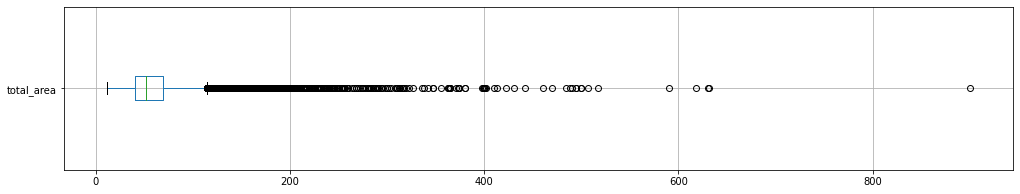

In [92]:
# диаграмма размаха для общей площади

data.boxplot('total_area', figsize=(17,3), vert=False);

<AxesSubplot:>

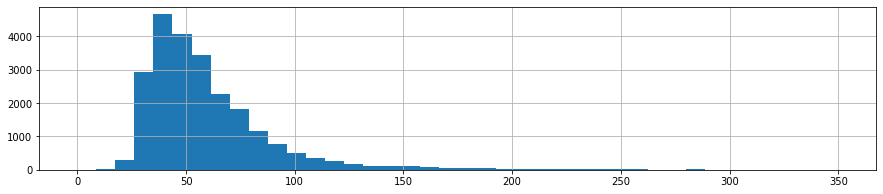

In [93]:
data['total_area'].hist(bins=40, figsize = (15,3), range=(0,350))

<AxesSubplot:>

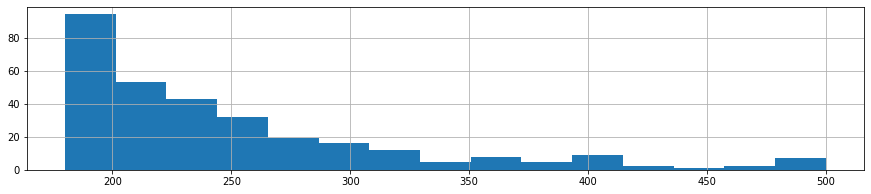

In [94]:
data['total_area'].hist(bins=15, figsize = (15,3), range=(180,500))

<AxesSubplot:>

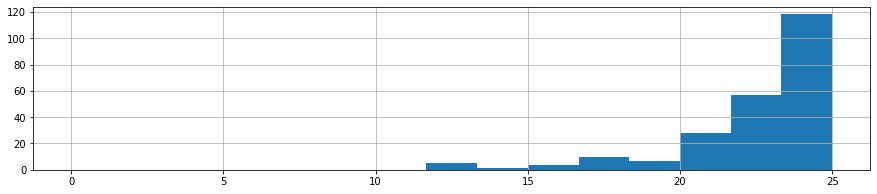

In [95]:
data['total_area'].hist(bins=15, figsize = (15,3), range=(0,25))

Значения менее 20 и более 250 можно считать выбросами. Удалим их.

In [96]:
data = data[(data['total_area'] >= 20) & (data['total_area'] <= 250)]

<AxesSubplot:>

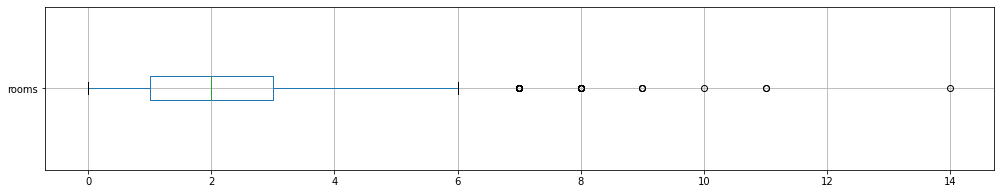

In [97]:
# диаграмма размаха для числа комнат

data.boxplot(column='rooms', figsize=(17,3), vert=False)

От 7 уже выбросы. Удаляем.

In [98]:
data = data[data['rooms'] < 7]

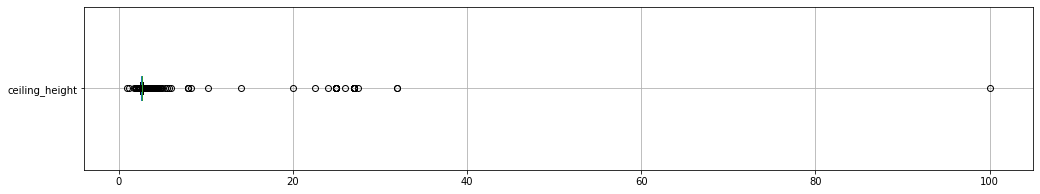

In [99]:
# диаграмма размаха для высоты потолков

data.boxplot(column='ceiling_height', figsize=(17,3), vert=False);

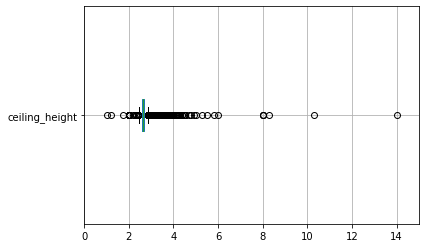

In [100]:
# немного приблизим

plt.xlim(0, 15)
data.boxplot(column='ceiling_height', figsize=(17,3), vert=False);

Есть выброс 100 м. Странные значения между 20 и 40 м (скорее всего, эти значения должны быть в 10 раз меньше). Подозрительные значения: ниже 2,5 м, в районе 8 м, а также от 10 до 14 м. 

До 3,5-4 вроде нормально (например, двухъярусные апартаменты с антресолью), но выше уже странно.

In [101]:
# оставим только высоту потолков от 2,5 м, уберем значение 100 м

data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] != 100)]

In [102]:
# уменьшим значения от 10 и более в 10 раз

for row in data: 
    data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10

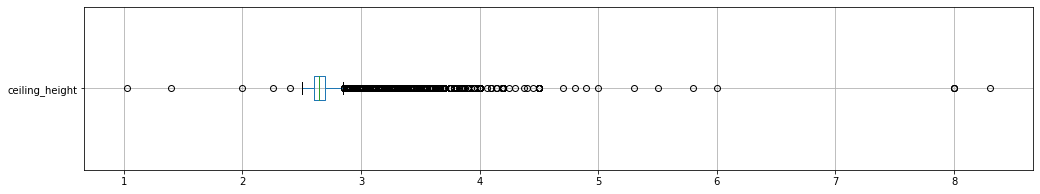

In [103]:
data.boxplot(column='ceiling_height', figsize=(17,3), vert=False);

In [104]:
# уберем значения ниже 2,5 м и больше 3,5

data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 3.5)]

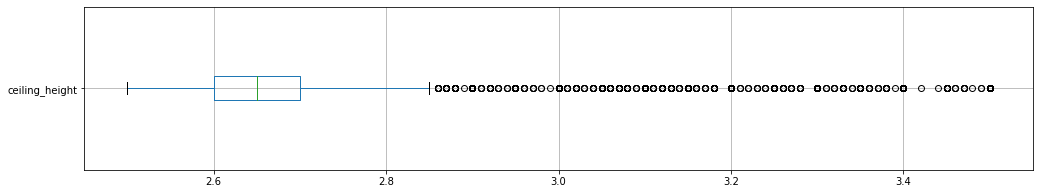

In [105]:
data.boxplot(column='ceiling_height', figsize=(17,3), vert=False);

In [106]:
len(data)

23047

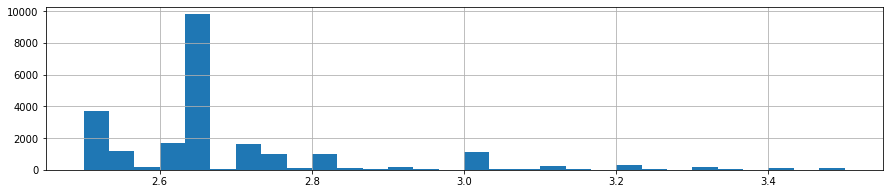

In [107]:
data['ceiling_height'].hist(bins=30, figsize = (15,3));

Больше удалять не будем: не хочется потерять много данных.

Обработаем аномалии в колонках `living_area`, `floors_total`, `kitchen_area`, `days_exposition`, `last_price`.

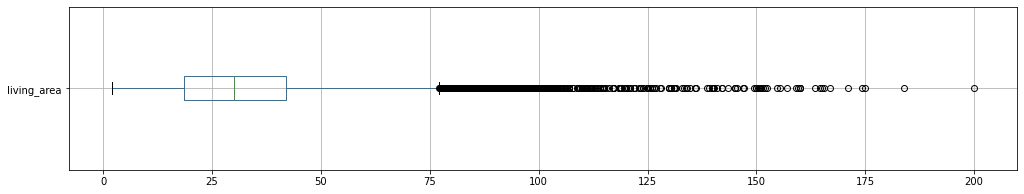

In [108]:
data.boxplot(column='living_area', figsize=(17,3), vert=False);

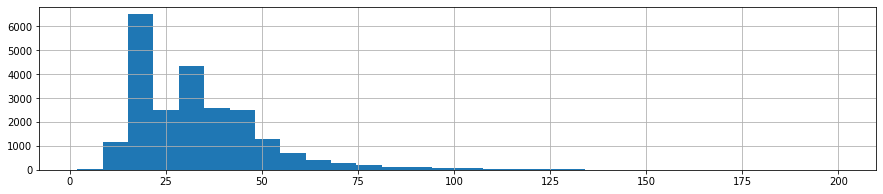

In [109]:
data['living_area'].hist(bins=30, figsize = (15,3));

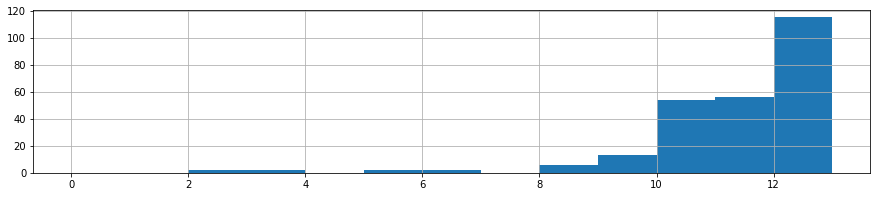

In [110]:
data['living_area'].hist(bins=13, figsize=(15,3), range=(0, 13));

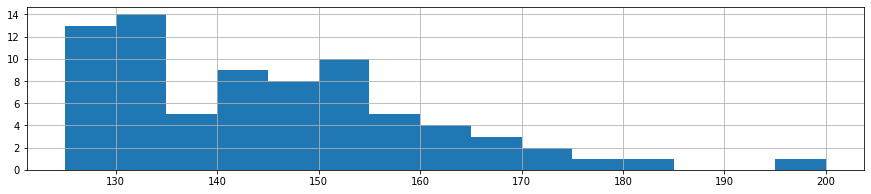

In [111]:
data['living_area'].hist(bins=15, figsize=(15,3), range=(125, 200));

In [112]:
# на основе анализа графиков оставим жилую площадь от 10 до 150 включительно

data = data.query('10 <= living_area <= 150')

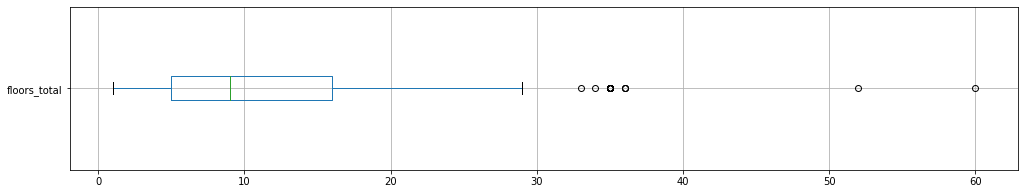

In [113]:
# теперь перейдем к числу этажей
# построим ящик с усами

data.boxplot(column='floors_total', figsize=(17,3), vert=False);

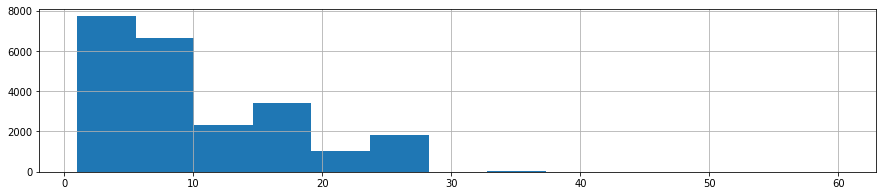

In [114]:
data['floors_total'].hist(bins=13, figsize=(15,3));

In [115]:
# более 30 этажей явно выбивается
# оставим до 30

data = data.query('floors_total < 30')

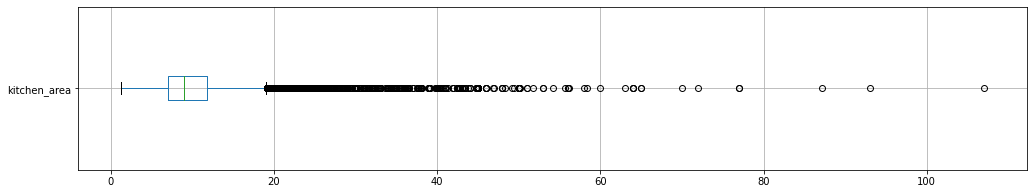

In [116]:
# далее площадь кухни

data.boxplot(column='kitchen_area', figsize=(17,3), vert=False);

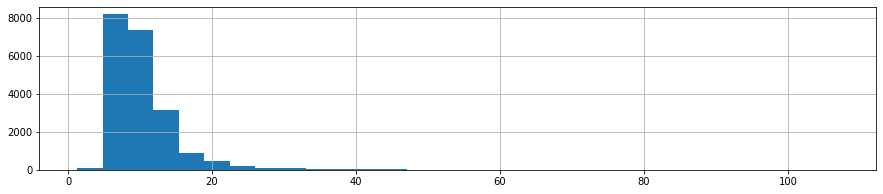

In [117]:
data['kitchen_area'].hist(bins=30, figsize=(15,3));

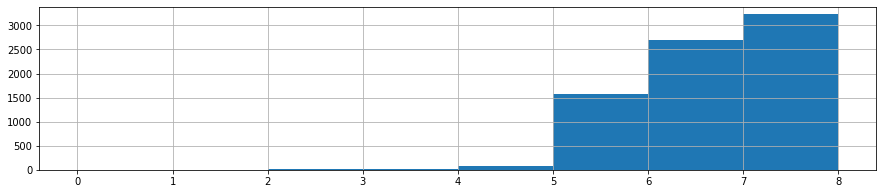

In [118]:
data['kitchen_area'].hist(bins=8, figsize=(15,3), range=(0, 8));

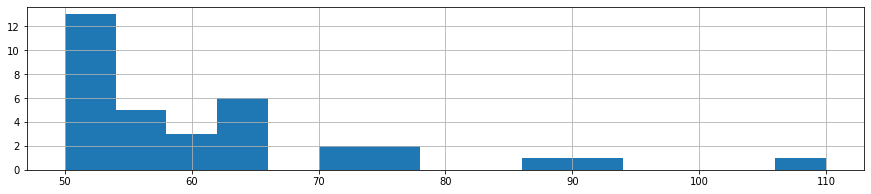

In [119]:
data['kitchen_area'].hist(bins=15, figsize=(15,3), range=(50, 110));

In [120]:
# оставляем от 5 и до 70

data = data.query('5 <= kitchen_area < 70 or kitchen_area.isna()')

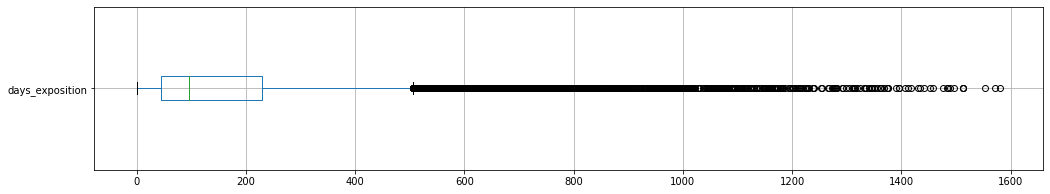

In [121]:
# ящик с усами для срока размещения

data.boxplot(column='days_exposition', figsize=(17,3), vert=False);

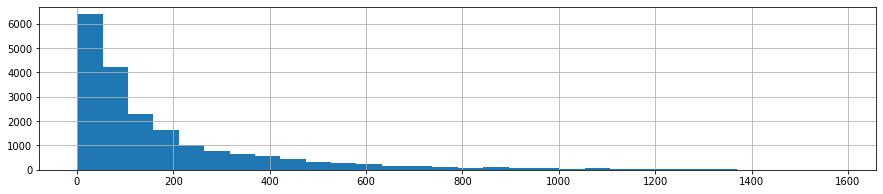

In [122]:
data['days_exposition'].hist(bins=30, figsize = (15,3));

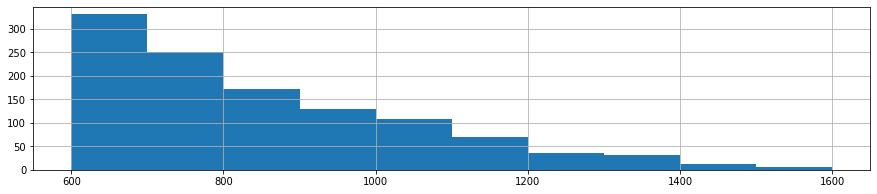

In [123]:
data['days_exposition'].hist(bins=10, figsize = (15,3), range=(600,1600));

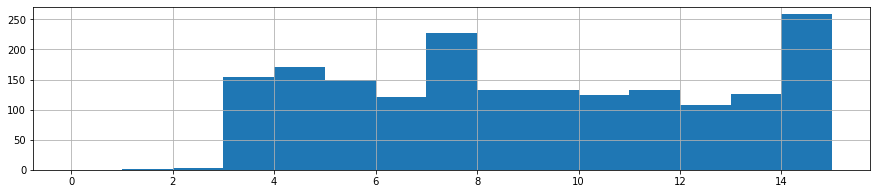

In [124]:
data['days_exposition'].hist(bins=15, figsize = (15,3), range=(0,15));

In [125]:
# оставим нижнюю границу 3 и верхнюю 1200

data = data.query('3 <= days_exposition <= 1200 or days_exposition.isna()')

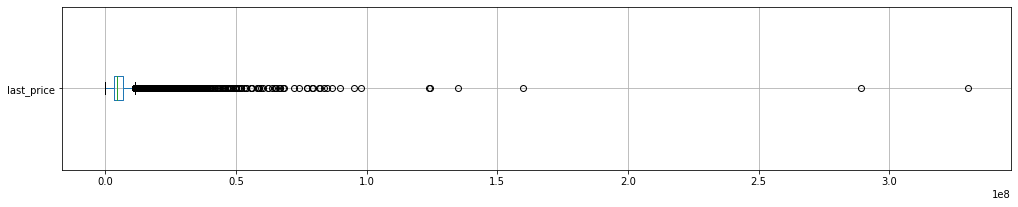

In [126]:
# последний параметр цена
# строим ящик с усами

data.boxplot(column='last_price', figsize=(17,3), vert=False);

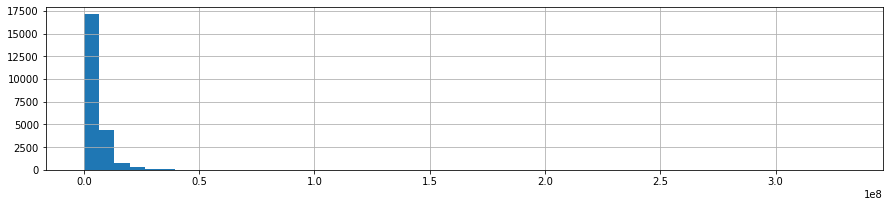

In [127]:
data['last_price'].hist(bins=50, figsize=(15,3));

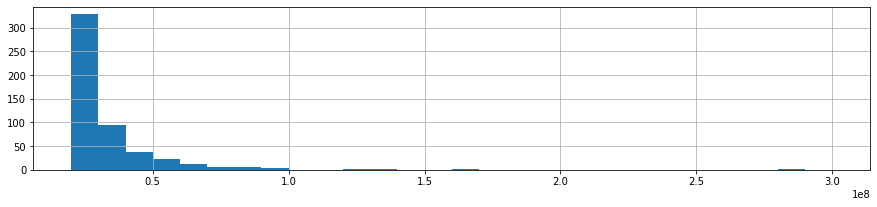

In [128]:
data['last_price'].hist(bins=28, figsize=(15,3), range=(20000000,300000000));

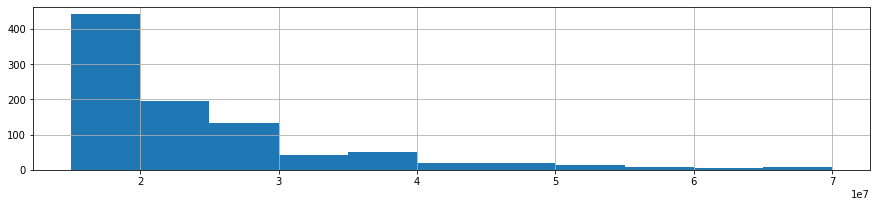

In [129]:
data['last_price'].hist(bins=11, figsize=(15,3), range=(15000000,70000000));

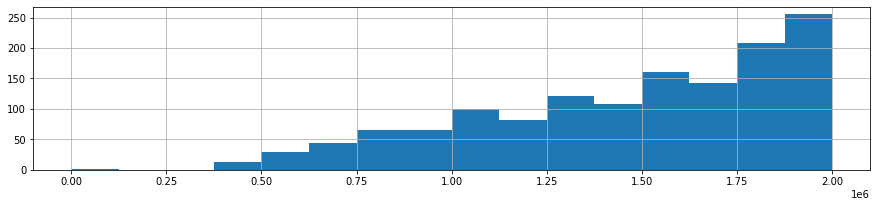

In [130]:
data['last_price'].hist(bins=16, figsize=(15,3), range=(0,2000000));

In [131]:
# добавим колонку со значением цены за квадратный метр

data['square_meter_price'] = data['last_price']/data['total_area']

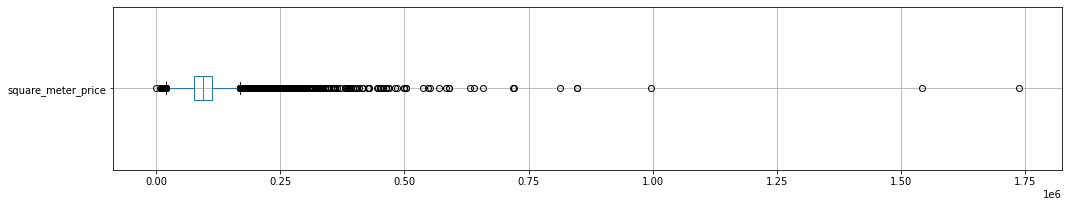

In [132]:
data.boxplot(column='square_meter_price', figsize=(17,3), vert=False);

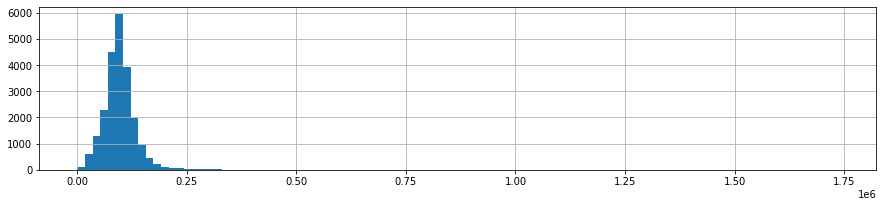

In [133]:
data['square_meter_price'].hist(bins=100, figsize=(15,3));

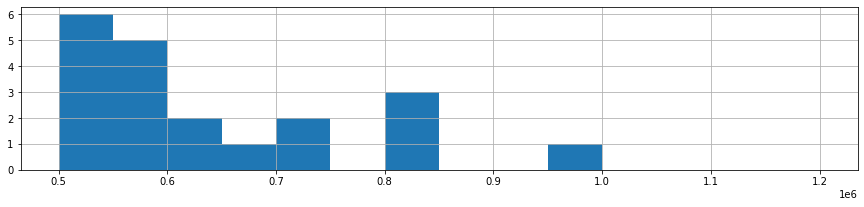

In [134]:
data['square_meter_price'].hist(bins=14, figsize=(15,3), range=(500000,1200000));

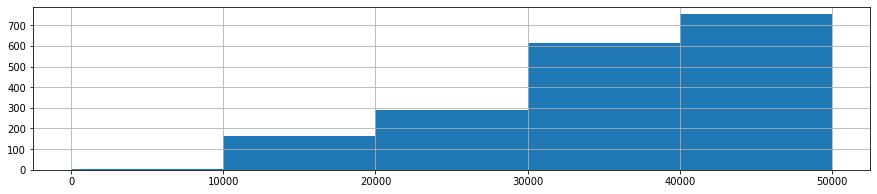

In [135]:
data['square_meter_price'].hist(bins=5, figsize=(15,3), range=(0,50000));

In [136]:
# оставляем цену за кв м от 10000 до 900000

data = data.query('10000 <= square_meter_price < 900000')

In [137]:
# оставляем объявления от 1 млн до 40 млн руб

data = data.query('1000000 <= last_price < 40000000')

In [138]:
len(data)

22456

In [139]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_liv_share,square_meter_price
count,22456.000000,2.245600e+04,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,22456.000000,20372.000000,22456.000000,17338.000000,17338.000000,17338.000000,16793.000000,17338.000000,17258.000000,19495.000000,22278.000000,22456.000000
mean,9.871527,5.793609e+06,57.786645,2.024270,2.681357,10.840132,33.096362,5.946829,10.319976,0.603180,28909.364892,14430.886406,0.586631,477.141130,0.743396,514.116120,174.314029,0.565497,97431.108523
std,5.654352,4.254757e+06,25.862803,0.975536,0.171528,6.543845,17.051368,4.883759,5.079875,0.966021,12714.123583,8502.868297,0.780759,234.082485,0.917342,197.316613,205.413569,0.064557,36944.198802
min,0.000000,1.000000e+06,20.000000,0.000000,2.500000,1.000000,10.000000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.482353,10507.246377
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.618824,2.000000,7.000000,0.000000,18433.500000,9771.000000,0.000000,435.000000,0.000000,474.000000,44.000000,0.482353,76923.076923
50%,9.000000,4.600000e+06,51.600000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26989.500000,13229.500000,0.000000,460.000000,0.000000,504.000000,94.000000,0.585009,94814.516046
75%,14.000000,6.600000e+06,68.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37418.000000,16373.500000,1.000000,460.000000,1.000000,564.000000,225.000000,0.631667,113333.333333
max,50.000000,3.999000e+07,250.000000,6.000000,3.500000,29.000000,150.000000,27.000000,65.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1200.000000,0.679412,848484.848485


Больше аномалий не видно. Можно идти дальше.

**Выводы**

Устранили выявленные аномалии:
* цена от десятков тыс. до 7+ сотен млн
* общая площадь от 12 до 900 м²
* число комнат от 0 до 19
* высота потолков от 1 м до 100 м (видимо человеческий фактор)
* число этажей до 60
* жилая площадь от 2 до 430 м²
* площадь кухни от 1,3 до 112 м²
* срок объявления от 1 до 1580 дней


## Подсчет и добавление новых столбцов

In [140]:
# добавим колонку со значением дня недели публикации объявления

data['weekday'] = data['first_day_exposition'].dt.weekday

In [141]:
# добавим колонку со значением месяца публикации объявления

data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [142]:
# добавим колонку со значением года публикации объявления

data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [143]:
# напишем функцию определения типа этажа

def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [144]:
# добавим столбец с типом этажа

data['floor_type'] = data.apply(floor_type, axis=1)

Добавим столбец с расстоянием до центра в км. Для этого создадим таблицу без пропусков в столбце с расстоянием до центра в м. В ней посчитаем расстояние в км. И добавим этот столбец в исходную таблицу.

In [145]:
data_city_center_km = data.query('city_centers_nearest.notna()')

In [146]:
data_city_center_km['city_center_km'] = (data_city_center_km['city_centers_nearest']/1000).astype('int')

In [147]:
data['city_center_km'] = data_city_center_km['city_center_km']

In [148]:
# проверим добавленные колонки

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,median_liv_share,square_meter_price,weekday,month_exposition,year_exposition,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,0.631667,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,584.5,81.0,0.482353,82920.792079,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,0.585009,92785.714286,3,8,2015,другой,13.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,0.585009,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,55.0,0.482353,95065.789474,0,9,2018,другой,NaN


**Выводы**

Посчитали и добавили в таблицу колонки со следующей информацией:
- цена за квадратный метр
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа: "первый", "последний", "другой"
- расстояние до центра населенного пункта в километрах

## Исследовательский анализ данных

 ### Исследование отдельных параметров объявлений

Начнем с **общей площади**.

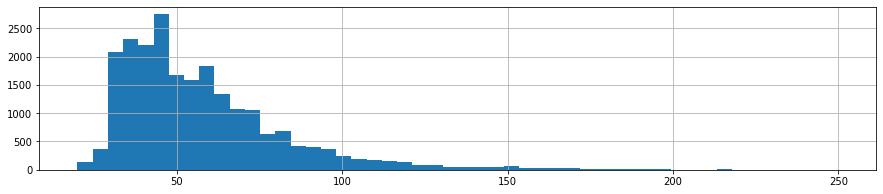

In [149]:
# построим гистограмму

data['total_area'].hist(bins=50, figsize=(15,3));

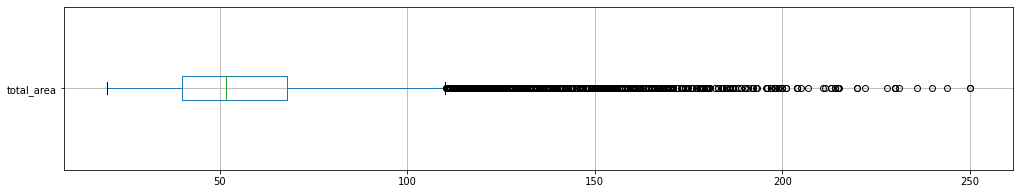

In [150]:
# построим ящик с усами

data.boxplot(column='total_area', figsize=(17,3), vert=False);

In [151]:
data['total_area'].describe()

count    22456.000000
mean        57.786645
std         25.862803
min         20.000000
25%         40.000000
50%         51.600000
75%         68.000000
max        250.000000
Name: total_area, dtype: float64

In [152]:
data['total_area'].value_counts().head()

45.0    404
42.0    371
60.0    336
44.0    333
31.0    332
Name: total_area, dtype: int64

Похоже на распределение Пуассона. Смещено влево. Наиболее часто встречающиеся значение 45 м², видимо однушки-двушки. Среднее значение 57.8 м², медиана 52 м², максимальное 250 м², минимальное 20 м².

**Жилая площадь**

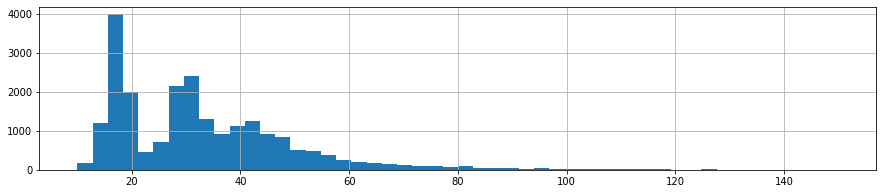

In [153]:
data['living_area'].hist(bins=50, figsize=(15,3));

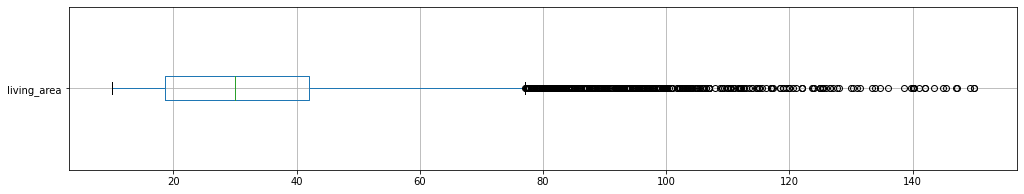

In [154]:
data.boxplot(column='living_area', figsize=(17,3), vert=False);

In [155]:
data['living_area'].describe()

count    22456.000000
mean        33.096362
std         17.051368
min         10.000000
25%         18.618824
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

In [156]:
data['living_area'].value_counts().head()

18.0    855
17.0    648
30.0    578
20.0    467
16.0    465
Name: living_area, dtype: int64

Наиболее часто встречающиеся значение 18 м². Среднее значение 33 м², медиана 30 м², максимальное 150 м², минимальное 10 м².

**Площадь кухни**

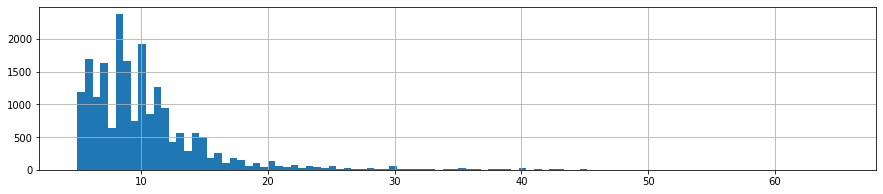

In [157]:
data['kitchen_area'].hist(bins=100, figsize=(15,3));

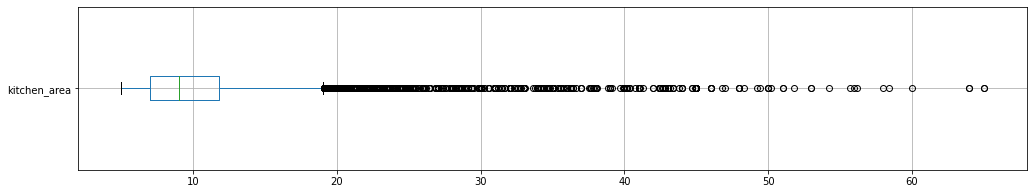

In [158]:
data.boxplot(column='kitchen_area', figsize=(17,3), vert=False);

In [159]:
data['kitchen_area'].describe()

count    20372.000000
mean        10.319976
std          5.079875
min          5.000000
25%          7.000000
50%          9.000000
75%         11.800000
max         65.000000
Name: kitchen_area, dtype: float64

In [160]:
data['kitchen_area'].value_counts().head()

10.0    1231
6.0     1231
8.0     1076
9.0     1062
7.0     1037
Name: kitchen_area, dtype: int64

Тоже относительно явное распределение Пуассона, смещено влево. Наиболее часто встречающиеся значение 10 м². Среднее значение 10,3 м², медиана 9 м², максимальное 65 м², минимальное 5 м².

**Стоимость квартиры**

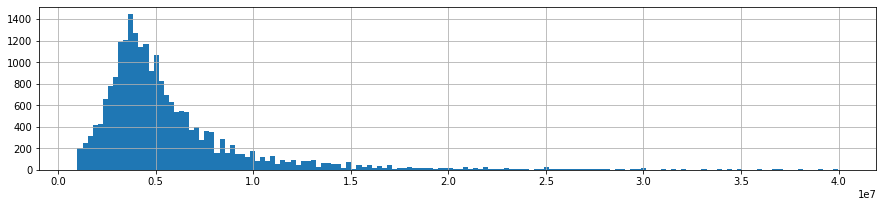

In [161]:
data['last_price'].hist(bins=150, figsize=(15,3));

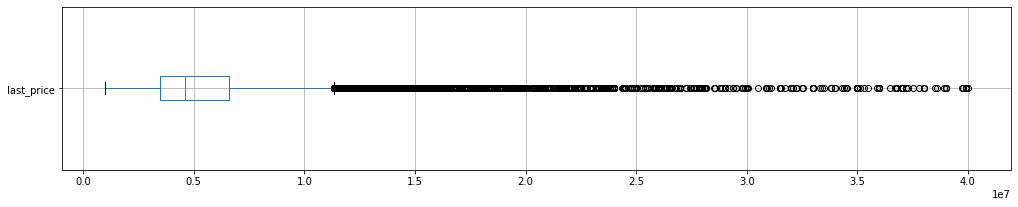

In [162]:
data.boxplot(column='last_price', figsize=(17,3), vert=False);

In [163]:
data['last_price'].describe()

count    2.245600e+04
mean     5.793609e+06
std      4.254757e+06
min      1.000000e+06
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.999000e+07
Name: last_price, dtype: float64

In [164]:
data['last_price'].value_counts().head()

4500000.0    339
3500000.0    287
4300000.0    256
4000000.0    255
3600000.0    254
Name: last_price, dtype: int64

Распределение Пуассона. Наиболее часто встречающиеся значение 4 600 000. Среднее значение 5 793 609, медиана 4 600 000, максимальное 39 990 000, минимальное 1 000 000.

**Число комнат**

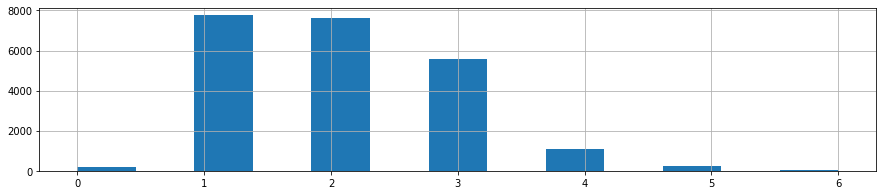

In [165]:
data['rooms'].hist(bins=13, figsize=(15,3));

In [166]:
data['rooms'].describe()

count    22456.000000
mean         2.024270
std          0.975536
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Больше всего однушек и двушек, медиана 2, минимум 0 (студии), максимум 6 комнат.

**Высота потолков**

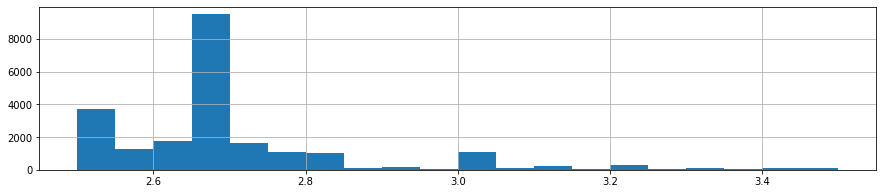

In [167]:
data['ceiling_height'].hist(bins=20, figsize=(15,3));

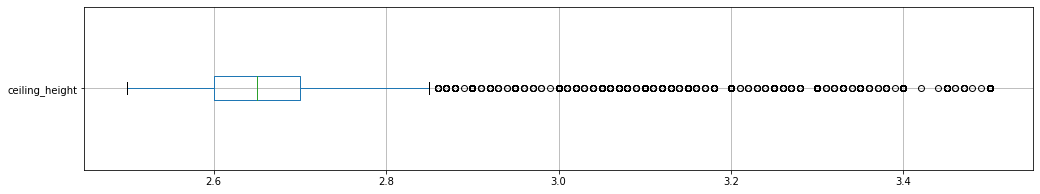

In [168]:
data.boxplot(column='ceiling_height', figsize=(17,3), vert=False);

In [169]:
data['ceiling_height'].describe()

count    22456.000000
mean         2.681357
std          0.171528
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

In [170]:
data['ceiling_height'].value_counts().head()

2.65    9405
2.50    3428
2.60    1621
2.70    1547
3.00    1051
Name: ceiling_height, dtype: int64

Наиболее часто встречающиеся значение 2,65 м совпадает с медианой. Среднее значение 2,68 м, максимальное 3,5 м, минимальное 2,5 м.

**Этаж**

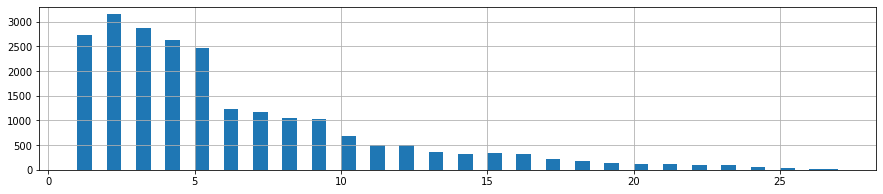

In [171]:
data['floor'].hist(bins=52, figsize=(15,3));

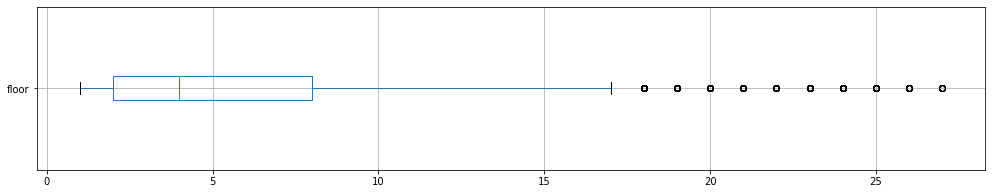

In [172]:
data.boxplot(column='floor', figsize=(17,3), vert=False);

In [173]:
data['floor'].describe()

count    22456.000000
mean         5.946829
std          4.883759
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [174]:
data['floor'].value_counts().head()

2    3148
3    2878
1    2725
4    2622
5    2471
Name: floor, dtype: int64

Больше всего квартир на 2 этаже, медиана 4, минимум 1, максимум 27 этаж.

**Тип этажа**

<AxesSubplot:>

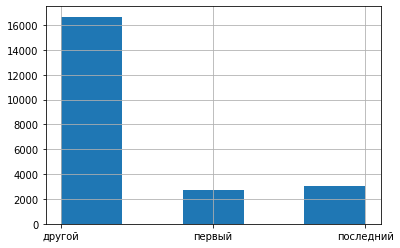

In [175]:
data['floor_type'].hist(bins=5)

Предсказуемо больше всего "других" этажей.

**Общее число этажей**

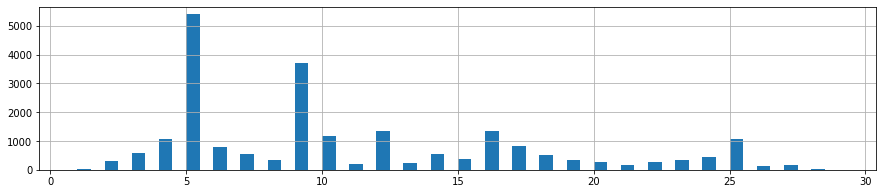

In [176]:
data['floors_total'].hist(bins=56, figsize=(15,3));

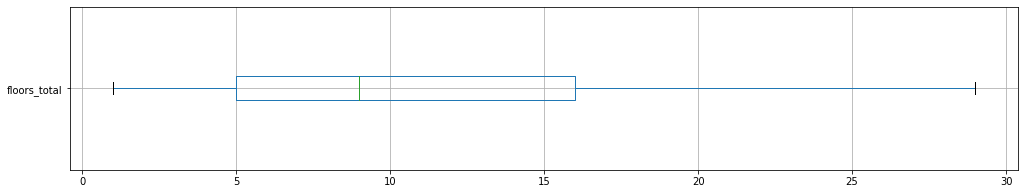

In [177]:
data.boxplot(column='floors_total', figsize=(17,3), vert=False);

In [178]:
data['floors_total'].describe()

count    22456.000000
mean        10.840132
std          6.543845
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [179]:
data['floors_total'].value_counts().head()

5     5398
9     3697
16    1358
12    1345
10    1159
Name: floors_total, dtype: int64

Больше всего 5-этажек, медиана 9, минимум 1, максимум 29 этажей.

**Расстояние до центра**

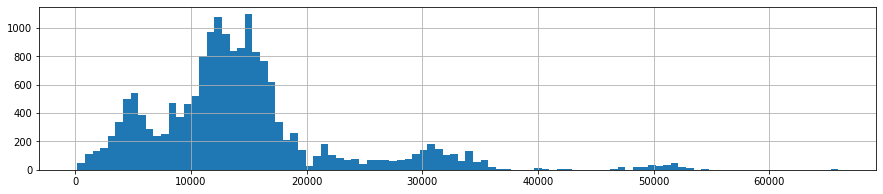

In [180]:
data['city_centers_nearest'].hist(bins=100, figsize=(15,3));

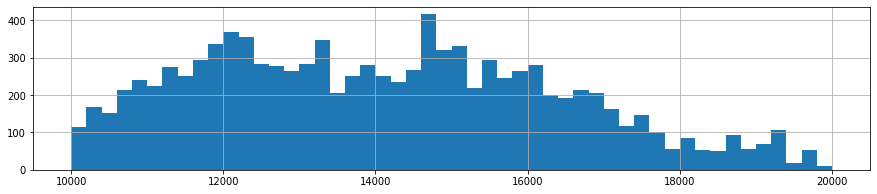

In [181]:
data['city_centers_nearest'].hist(bins=50, figsize=(15,3), range=(10000,20000));

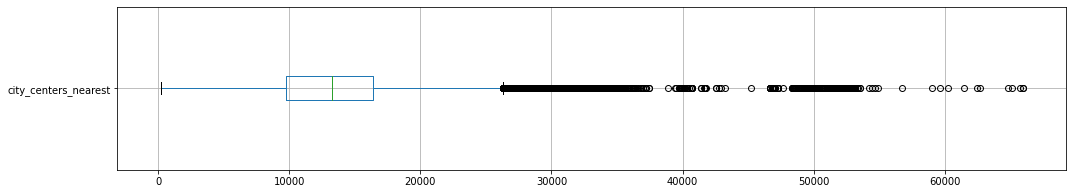

In [182]:
data.boxplot(column='city_centers_nearest', figsize=(17,3), vert=False);

In [183]:
data['city_centers_nearest'].describe()

count    17338.000000
mean     14430.886406
std       8502.868297
min        181.000000
25%       9771.000000
50%      13229.500000
75%      16373.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Чаще всего расстояние до центра 12000-16000 м, медиана 13230, минимум 181, максимум 65968 (возможно, имеется в виду от поселка до центра Питера).

**Расстояние до ближайшего аэропорта**

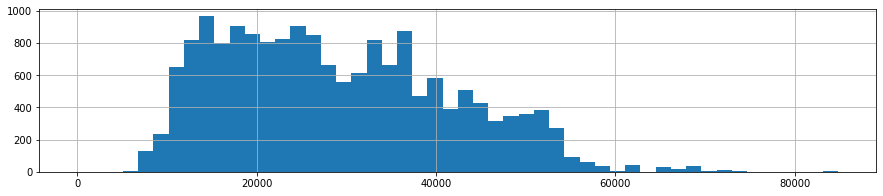

In [184]:
data['airports_nearest'].hist(bins=50, figsize=(15,3));

In [185]:
data['airports_nearest'].describe()

count    17338.000000
mean     28909.364892
std      12714.123583
min          0.000000
25%      18433.500000
50%      26989.500000
75%      37418.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [186]:
data['airports_nearest'].value_counts().head()

26763.0    77
37434.0    58
21928.0    32
44870.0    29
39946.0    28
Name: airports_nearest, dtype: int64

In [187]:
data.query('airports_nearest < 6500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,median_liv_share,square_meter_price,weekday,month_exposition,year_exposition,floor_type,city_center_km
4017,7,2268000.0,35.0,2017-12-21,1,2.65,9,14.0,6,False,...,1.0,444.0,25.0,0.482353,64800.000000,3,12,2017,другой,17.0
12899,8,4199000.0,56.0,2017-12-21,2,2.65,9,27.0,5,False,...,1.0,444.0,24.0,0.585009,74982.142857,3,12,2017,другой,17.0
21085,0,7000000.0,34.7,2018-09-23,1,2.70,9,19.8,3,False,...,0.0,504.0,60.0,0.482353,201729.106628,6,9,2018,другой,22.0


In [188]:
data.query('airports_nearest < 6500')[['locality_name', 'airports_nearest']]

,locality_name,airports_nearest
4017,Санкт-Петербург,6450.0
12899,Санкт-Петербург,6450.0
21085,Санкт-Петербург,0.0


Такое ощущение, что продается жилая квартира прямо в здании аэропорта, либо это расстояние можно считать пропуском.

Самое распростаненное расстояние в диапазоне 26763 м, медиана 26989, минимум 6450 (за исключением нулевого значения), максимум 84869 м.

**Расстояние до ближайшего парка**

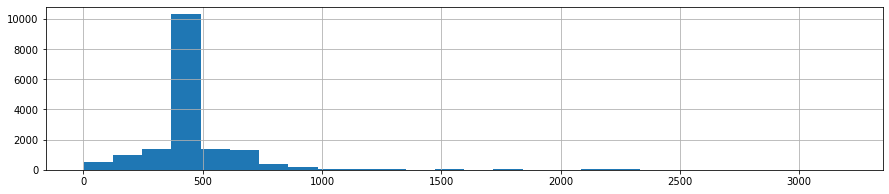

In [189]:
data['parks_nearest'].hist(bins=26, figsize=(15,3));

In [190]:
data['parks_nearest'].describe()

count    16793.000000
mean       477.141130
std        234.082485
min          1.000000
25%        435.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

В основном до ближайшего парка чуть меньше 500 м, медиана 460 м, минимум 1, максимум 3190 м.

**День публикации**

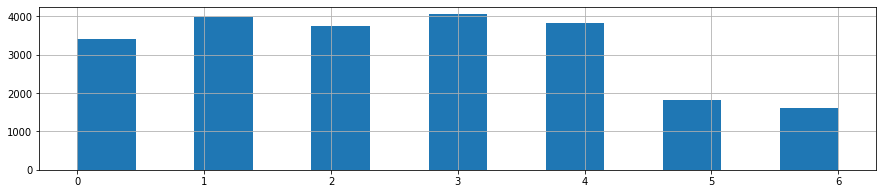

In [191]:
data['weekday'].hist(bins=13, figsize=(15,3));

Чаще всего публикуют в будни, особенно вторник и четверг.

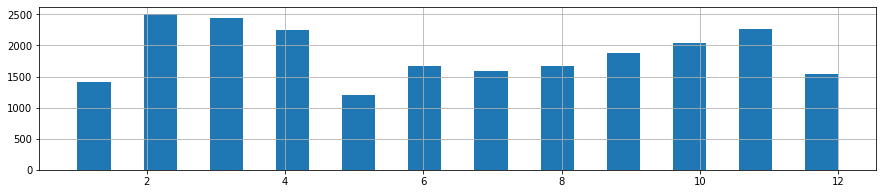

In [192]:
data['month_exposition'].hist(bins=23, figsize=(15,3));

Пики числа публикаций приходятся на февраль-март и октябрь-ноябрь, т.е. незадолго до и после Нового года. Февраль опережает все месяцы по числу размещенных объявлений. Верноятно, дело в том, что в январе у потенциальных покупателей меньше возможностей взять ипотеку из-за новогодних праздников (низкая покупательская активность). Поэтому продавцы отгягивают момент публикации на февраль, когда люди вернутся с каникул, а банки - в рабочий режим.

**Выводы**

Основной костяк объявлений - жилые квартиры однушки и двушки общей площадью 40-45 м² с жилой площадью 18-30 м², площадью кухни около 10 м² и высотой потолков в районе 2,7 м. Их стоимость премущественно в диапазоне 4-7 млн.руб. Большая часть квартир между 2 и 5 этажами. Да и в принципе 5-этажек среди объявлений больше всего. Обычно расстояние до центра 12-16 км, до аэропорта - 26 км, до ближайшего парка менее 500 м. Подаляющая часть объявлений публикуется в будни. По месяцам: февраль-март и октябрь-ноябрь.

### Сроки продажи квартир

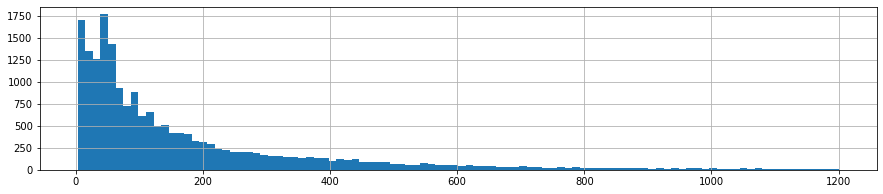

In [193]:
# посмотрим распределение

data['days_exposition'].hist(bins=100, figsize=(15,3));

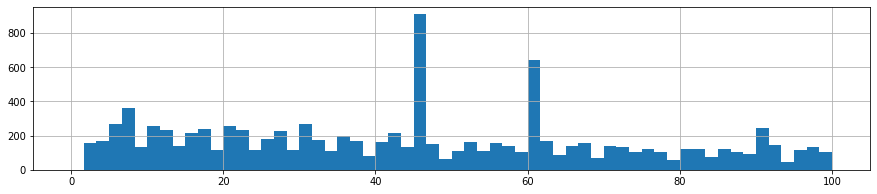

In [194]:
data['days_exposition'].hist(bins=60, figsize=(15,3), range=(0,100));

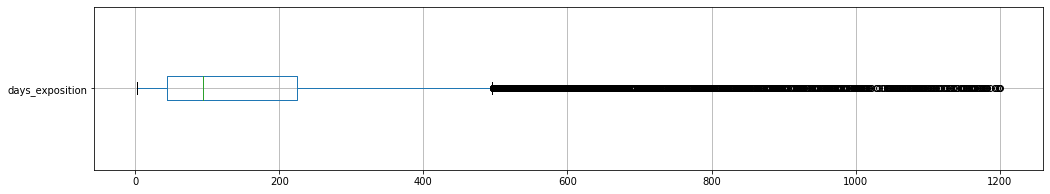

In [195]:
data.boxplot(column='days_exposition', figsize=(17,3), vert=False);

In [196]:
data['days_exposition'].describe()

count    19495.000000
mean       174.314029
std        205.413569
min          3.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1200.000000
Name: days_exposition, dtype: float64

In [197]:
data['days_exposition'].value_counts().head()

45.0    824
60.0    533
7.0     226
30.0    201
90.0    178
Name: days_exposition, dtype: int64

Взглянем, как с годами менялась скорость продаж. 

In [198]:
# создадим таблицу со средним сроком размещения объявлений
# в зависимости от года

data_year_days = data.pivot_table(index='year_exposition', values='days_exposition').reset_index()

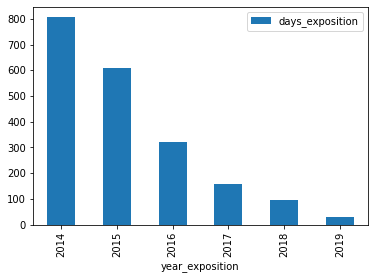

In [199]:
data_year_days.plot(x='year_exposition', y='days_exposition', kind='bar');

In [200]:
# число непроданных квартир по годам

data.query('days_exposition.isna()').groupby('year_exposition').agg({'last_price':'count'}).reset_index()

,year_exposition,last_price
0,2014,17
1,2015,63
2,2016,59
3,2017,238
4,2018,885
5,2019,1699


Может показаться, что с увеличением значения года скорость продажи значительно увеличивается. Однако стоит учесть, что с увеличением года растет число непроданных квартир. Это может искажать реальную динамику скорости продаж.

**Вывод**

Чаще всего объявление снимают через 45 или 60 дней (моды), т.к. это сроки бесплатного размещения объявлений для квартир до 4,5 млн и от 4,5 до 10 млн соответсвенно. Это отажается на среднем значении (173 дня), естественно, уменьшая его. Медиана 94 дня. Необычно долгими можно считать сроки более 225 дней, а необычно быстрыми - до 44 дней.

### Зависимость цены от других параметров

Изучим зависимость цены `'last_price'` от следующих параметров: `'total_area'`, `'living_area'`, `'kitchen_area'`, `'rooms'`, `'floor_type'`, `'weekday'`, `'month_exposition'`, `'year_exposition'`. 

Сначала взглянем на взаимосвязь цены с **разными видами площади**.

In [201]:
# создадим список интересующих столбцов

price_area_list = ['last_price', 'total_area', 'living_area', 'kitchen_area']

In [202]:
data[price_area_list].corr()['last_price'].sort_values(ascending=False)

last_price      1.000000
total_area      0.775832
living_area     0.670809
kitchen_area    0.598276
Name: last_price, dtype: float64

Видим наибольшую корреляцию с общей площадью (0,77). Для наглядности построим диаграммы рассеяния.

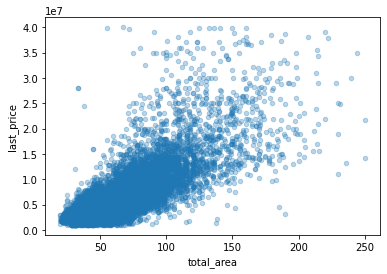

In [203]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

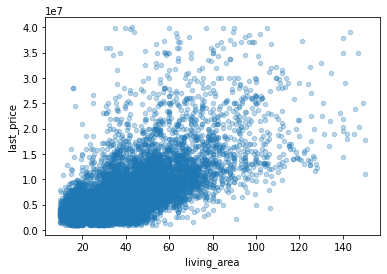

In [204]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);

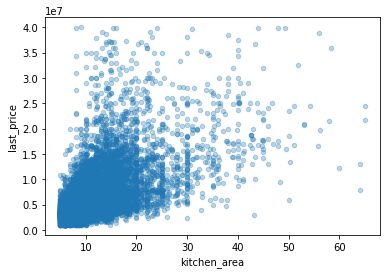

In [205]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);

По разным видам площади наибольшая взаимосвязь цены с **общей** очевидна: тендеция более четкая, с ростом общей площади точки остаются кучнее, чем у площади кухни и жилой.

Теперь изучим взаимосвязь цены с остальными параметрами. Для этого создадим сводные таблицы с медианными ценами по значениям параметров.

**Число комнат**

In [206]:
rooms_stat = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()

In [207]:
rooms_stat['last_price'].corr(rooms_stat['rooms'])

0.9746831506378981

<AxesSubplot:xlabel='rooms'>

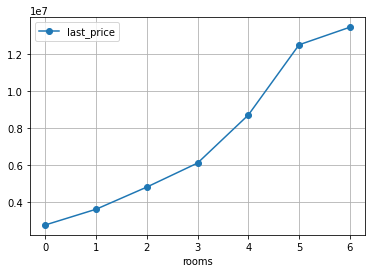

In [208]:
rooms_stat.plot(x='rooms', y='last_price', style='o-', grid=True) 

Пока самая высокая корреляция из всех (0.97). Но помним, что цены здесь медианные.

**Тип этажа**

In [209]:
floor_type_stat = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()

In [210]:
# функция переименования типа в соответсвующее цисловое значения
# понадобится для построения графика

def floor_type_number(floor_type):
    if floor_type == 'первый':
        return 1
    elif floor_type == 'другой':
        return 2
    elif floor_type == 'последний':
        return 3

In [211]:
floor_type_stat['floor_type'] = floor_type_stat['floor_type'].apply(floor_type_number)

In [212]:
floor_type_stat['last_price'].corr(floor_type_stat['floor_type'])

0.409644015186457

<AxesSubplot:xlabel='floor_type'>

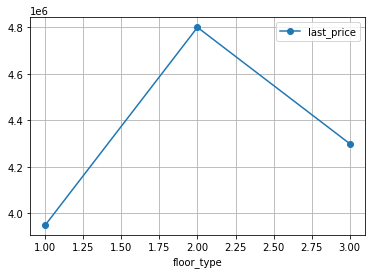

In [213]:
floor_type_stat.sort_values(by='floor_type')\
.plot(x='floor_type', y='last_price', style='o-', grid=True)

Корреляция 0,41. Не очень сильная. Больше цены обычно у категории "другой".

**День недели**

In [214]:
weekday_stat = data.pivot_table(index='weekday', values='last_price', aggfunc='median').reset_index()

<AxesSubplot:xlabel='weekday'>

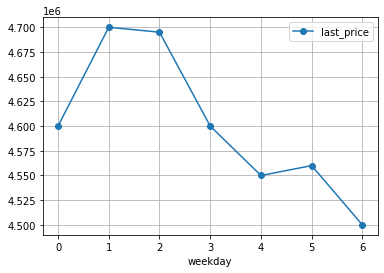

In [215]:
weekday_stat.plot(x='weekday', y='last_price', style='o-', grid=True)

Цены растут ко вторнику-среде и неравномерно падают к концу недели.

**Месяц**

In [216]:
month_stat = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()

<AxesSubplot:xlabel='month_exposition'>

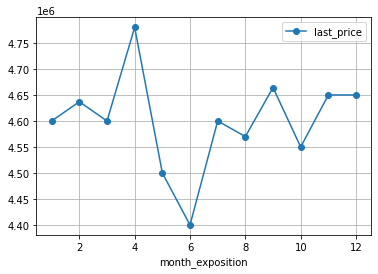

In [217]:
month_stat.plot(x='month_exposition', y='last_price', style='o-', grid=True)

Видно, что цены быстро растут к апрелю и резко падают к июню.

**Год**

In [218]:
year_stat = data.pivot_table(index='year_exposition', values=['total_area', 'last_price'],\
                             aggfunc=['median', 'count']).reset_index()

In [219]:
year_stat.columns = ['year', 'median_price', 'median_area', 'count', 'also_count']

In [220]:
year_stat = year_stat[['year', 'median_price', 'median_area', 'count']]

In [221]:
year_stat['median_price'].corr(year_stat['year'])

-0.6375580283225675

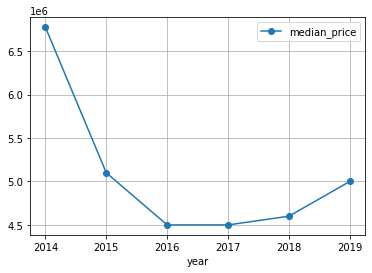

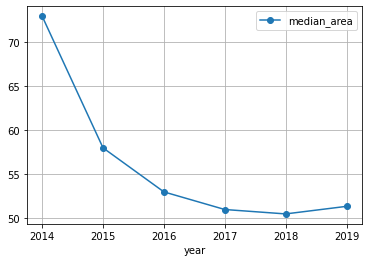

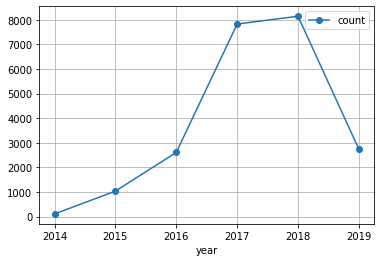

In [222]:
year_stat.plot(x='year', y='median_price', style='o-', grid=True);
year_stat.plot(x='year', y='median_area', style='o-', grid=True);
year_stat.plot(x='year', y='count', style='o-', grid=True);

С годом интереснее. Корреляция -0.64. Заметная обратная зависимость, которая плавно переходит в прямую. Видим, что рост предложения все более маленьких квартир снижает с годами цену недвижимости. С последующим восстановлением.

**Вывод**

Стоимость жилья имеет наибольшую прямую связь с:
- общей площадью (0,77),
- числом комнат (0,97).

Наибольшую обратную связь с годом публикации объявления (-0.64)

Также стоит отметить, что бОльшую цену имеют квартиры выше первого и ниже последнего этажей в доме.



### Средняя цена одного квадратного метра

Посчитаем среднюю цену одного м² в 10 населённых пунктах с наибольшим числом объявлений.

In [223]:
# построим сводную таблицу по локациям со средней ценой м² и числом объявлений

sqr_meter_stat = data.pivot_table(index='locality_name', values='square_meter_price',\
                 aggfunc=['mean', 'count']).reset_index()

In [224]:
# для удобства переименуем колонки

sqr_meter_stat.columns = ['locality_name', 'mean', 'count']

In [225]:
# сохраним первые 10 по числу объявлений

sqr_meter_stat = \
sqr_meter_stat.sort_values(by='count', ascending=False).set_index('locality_name').head(10)

In [226]:
sqr_meter_stat['mean'] = sqr_meter_stat['mean'].round(2)

In [227]:
# отсортируем по убыванию средней цены

sqr_meter_stat.sort_values(by='mean', ascending=False)

,mean,count
locality_name,,
Санкт-Петербург,111171.27,14917
Пушкин,102706.76,353
Кудрово,95258.25,468
Парголово,90289.69,324
Мурино,85891.44,579
Шушары,78493.90,435
Колпино,75352.48,336
Гатчина,69094.47,300
Всеволожск,68698.58,393


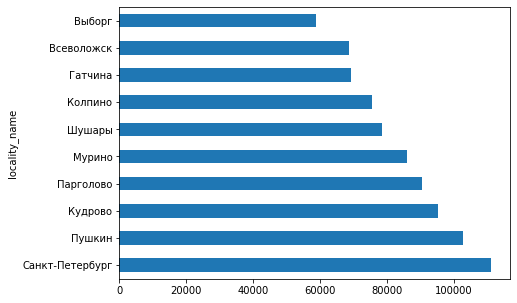

In [228]:
#  построим столбчатую диаграмму

sqr_meter_stat.sort_values(by='mean', ascending=False)['mean'].plot(kind='barh', figsize=(7, 5));

**Вывод**

Из 10 самых популяных населенных пунктов

- самые дорогие: Санкт-Петербург, Пушкин (более 100000 руб/м²). 
- самые дешевые: Выборг, Гатчина, Всеволожск (менее 70000 руб/м²).

### Зависимость стоимости от расстояния до центра города

Беря в расчет параметр удаленности от центра города, определим среднюю цену каждого километра в Санкт-Петербурге.

In [229]:
# создадим сводную таблицу со средней ценой каждого км в Санкт-Петербурге

spb_km_center_price = data.query('locality_name == "Санкт-Петербург"')\
                      .pivot_table(index='city_center_km', values='last_price').reset_index()

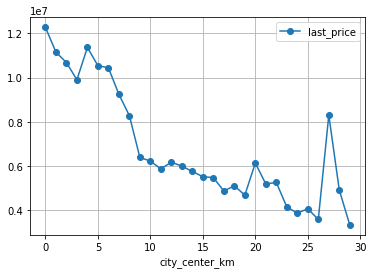

In [230]:
# построим график зависимости средней цены от километра до центра

spb_km_center_price.plot(x='city_center_km', y='last_price', style='o-', grid=True);

In [231]:
spb_km_center_price['last_price'].corr(spb_km_center_price['city_center_km'])

-0.8480539522561374

Предсказуемая обратная зависимость (коррелляция -0,85).

In [232]:
# посмотрим на аномальный 27-й км

data.query('city_center_km == 27 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,median_liv_share,square_meter_price,weekday,month_exposition,year_exposition,floor_type,city_center_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,504.0,128.0,0.585009,193918.918919,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,504.0,178.0,0.482353,70312.500000,1,2,2018,последний,27.0


Всего 2 строки, одна из которых очень выбивается по цене.

Посмотрим доли типов этажей между 3 и 5 км.

In [233]:
km_floor_type = data.query('locality_name == "Санкт-Петербург" and\
                   (city_center_km == 2 or city_center_km == 3 or\
                   city_center_km == 4 or city_center_km == 5)')\
                  .pivot_table(index='floor_type', columns='city_center_km',\
                   values='rooms', aggfunc='count').reset_index()

In [234]:
km_floor_type

city_center_km,floor_type,2.0,3.0,4.0,5.0
0,другой,137,289,600,490
1,первый,35,68,76,69
2,последний,64,94,111,97


In [235]:
km_floor_type.columns = ['floor_type', 'km_2', 'km_3', 'km_4', 'km_5']

In [236]:
km_floor_type['share_km_2'] = ((km_floor_type['km_2']/km_floor_type['km_2'].sum())*100).astype('int')

In [237]:
km_floor_type['share_km_3'] = ((km_floor_type['km_3']/km_floor_type['km_3'].sum())*100).astype('int')

In [238]:
km_floor_type['share_km_4'] = ((km_floor_type['km_4']/km_floor_type['km_4'].sum())*100).astype('int')

In [239]:
km_floor_type['share_km_5'] = ((km_floor_type['km_5']/km_floor_type['km_5'].sum())*100).astype('int')

In [240]:
km_floor_type = km_floor_type.drop(['km_2', 'km_3', 'km_4', 'km_5'], axis=1)

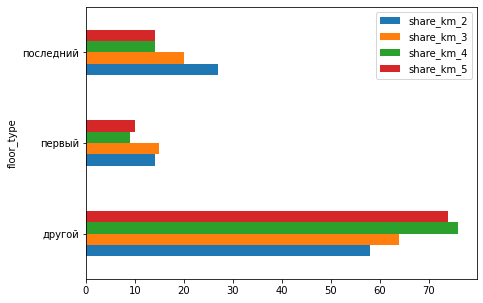

In [241]:
km_floor_type.plot(x='floor_type', kind='barh', figsize=(7, 5));

 **Вывод**

Чем дальше от центра, тем дешевле жилье. Однако на 27 километре происходит резкий скачек средней цены: там всего 2 записи и одно из них аномальное (143,5 млн). Между 3 и 5 км произошло сначала падение, потом всплеск доли квартир с `другим` типом этажа. Это может частично объяснить характерное колебание средней цены на этом промежутке.

## Общий вывод

Практически все квартиры в данных - жилые. В основном однушки и двушки общей площадью 40-45 м² с жилой площадью 18-30 м², площадью кухни около 10 м² и высотой потолков в районе 2,7 м. Большая часть квартир в 5-этажках между 2 и 5 этажами, с расстоянием до ближайшего парка менее 500 м. 

Их стоимость премущественно в диапазоне 4-7 млн.руб, в основном зависит от общей площади (0,77), числа комнат (0,97) и этажа (не первый и не последний - дороже). Непосредственно в Санкт-Петербурге еще очень важна удаленность от центра (-0,85). Обычно расстояние до центра 12-16 км, до аэропорта - около 26 км. Подаляющая часть объявлений публикуется в будни. По месяцам: февраль-март и октябрь-ноябрь. Средний срок продажи квартиры составляет 173 дня. Кстати увеличение года публикации негативно связано с ценой  (корреляция -0,64).

Самые дорогие населенные пункты: Санкт-Петербург, Пушкин (более 100000 руб/м²). Самые дешевые среди 10 популярных: Выборг, Гатчина, Всеволожск (менее 70000 руб/м²).

Огромное число пропущенных картографических данных: по 92% населенных пунктов этих данных нет - это проблема. 

Основные выбросы - аномальные разбросы цен, этажей, сроков объявления, числа комнат и всех видов площадей. Также были ошибки/странные значения в высоте потолков (1-100 м). Наверно, человеческий фактор.